In [1]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.pyplot as plt

from utils_test1 import generation_3dbox

In [2]:
box,loc=generation_3dbox()
box=box[0]
loc=loc[0]
box.shape,loc.shape

((14, 3), (14, 3))

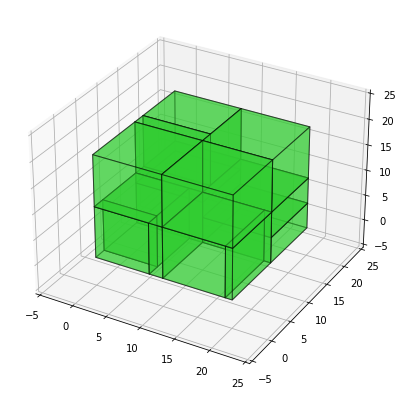

In [3]:
def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCubeAt2(positions,sizes=None,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)): colors=["C0"]*len(positions)
    if not isinstance(sizes,(list,np.ndarray)): sizes=[(1,1,1)]*len(positions)
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s) )
    return Poly3DCollection(np.concatenate(g),  
                            facecolors=np.repeat(colors,6), alpha=0.5, **kwargs)
    

positions = loc #[(-3,5,-2),(1,7,1)]
sizes = box #[(4,5,3), (3,3,7)]
colors = ["limegreen"]*len(positions)#["crimson","limegreen"]
# colors = np.empty([20,20,20] + [4], dtype=np.float32)
# alpha = .5
# colors[0] = [1, 0, 0, alpha]
# colors[1] = [0, 1, 0, alpha]
# # colors[2] = [0, 0, 1, alpha]
# colors[3] = [1, 1, 0, alpha]
# colors[4] = [0, 1, 1, alpha]

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.set_aspect('auto')

pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor="k")
ax.add_collection3d(pc)    

ax.set_xlim([-5,25])
ax.set_ylim([-5,25])
ax.set_zlim([-5,25])

plt.show()